# HUK Challenge

In [81]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.preprocessing as sk_preprocess

In [82]:
pd_risk_data = pd.read_csv("riskmodel.csv")

In [83]:
pd_risk_data.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,0.0
1,3,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,0.0
2,5,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,0.0
3,10,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,0.0
4,11,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,0.0


## Data Overview

In [85]:
pd_risk_data.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,Target
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,6.780130e+05
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,3.832608e+02
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,3.682070e+04
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000e+00
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000e+00
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000e+00
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000e+00
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,1.852455e+07


In [ ]:
pd_risk_data["Target"] = pd_risk_data["ClaimAmount"] / pd_risk_data["Exposure"]

In [6]:
pd_risk_data["Exposure"].describe()

count    678013.000000
mean          0.528750
std           0.364442
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64

<AxesSubplot: >

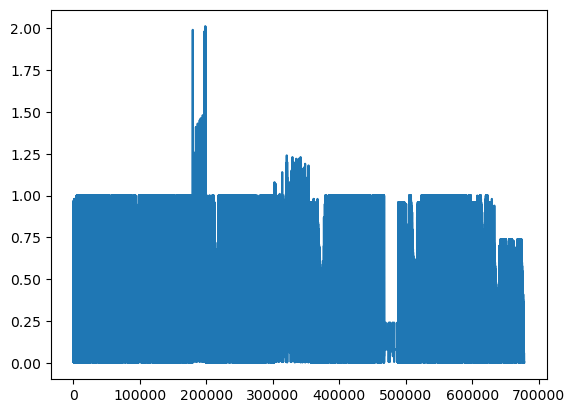

In [7]:
pd_risk_data["Exposure"].plot()

<AxesSubplot: >

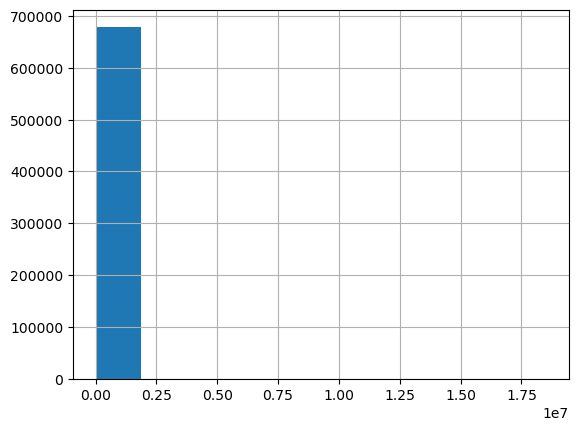

In [8]:
pd_risk_data["Target"].hist()

In [9]:
pd_risk_data["Target_log"] = np.log(pd_risk_data["Target"])

D:\Users\procy\anaconda3\envs\goldeneye\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
pd_risk_data["Target_sqrt"] = np.sqrt(pd_risk_data["Target"])

In [11]:
#pd_risk_data.loc[pd_risk_data.loc[:,"Target_log"] < 0, "Target_log"] = 0.0

<AxesSubplot: >

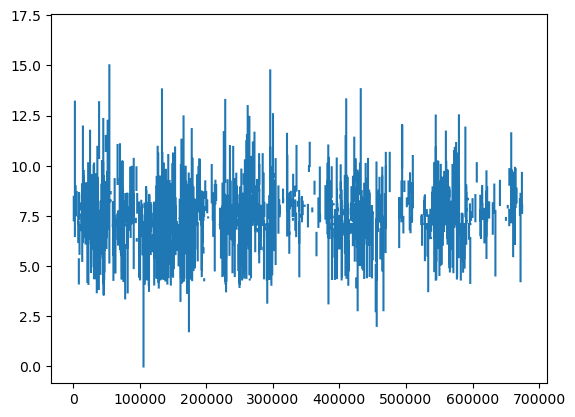

In [12]:
pd_risk_data["Target_log"].plot()

ValueError: supplied range of [-inf, 16.734607329388563] is not finite

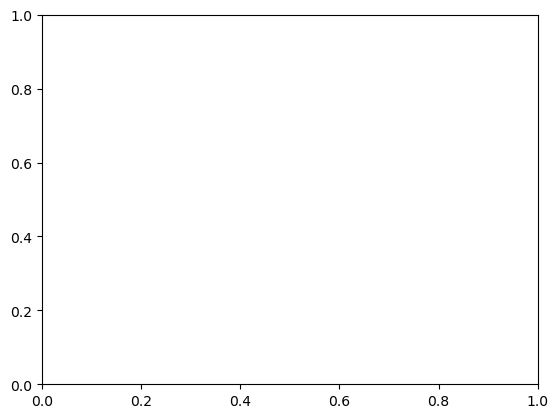

In [13]:
pd_risk_data["Target_log"].hist()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_62136\1557159393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pd_risk_data.corr()


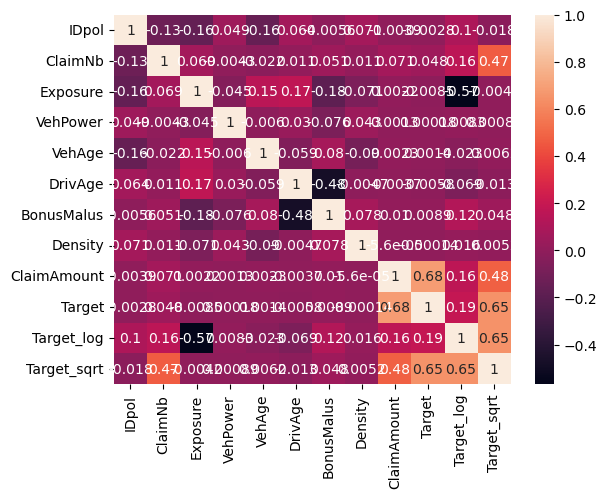

In [16]:

corr_matrix = pd_risk_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix = pd_risk_data.corr()
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

In [ ]:
sn.pairplot(pd_risk_data)

In [17]:
pd_risk_data.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Target,Target_log,Target_sqrt
0,1,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,0.0,0.0,-inf,0.0
1,3,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,0.0,0.0,-inf,0.0
2,5,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,0.0,0.0,-inf,0.0
3,10,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,0.0,0.0,-inf,0.0
4,11,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,0.0,0.0,-inf,0.0


In [18]:
area_encoder = sk_preprocess.LabelEncoder()
vehbrand_encoder = sk_preprocess.LabelEncoder()
vehgas_encoder = sk_preprocess.LabelEncoder()
region_encoder = sk_preprocess.LabelEncoder()

In [19]:
area_encoder.fit(pd_risk_data["Area"])
vehbrand_encoder.fit(pd_risk_data["VehBrand"])
vehgas_encoder.fit(pd_risk_data["VehGas"])
region_encoder.fit(pd_risk_data["Region"])

LabelEncoder()

In [20]:
area_encoder.get_params()

{}

In [21]:
pd_risk_data["Area"].unique()

array(['D', 'B', 'E', 'C', 'F', 'A'], dtype=object)

In [22]:
pd_risk_data["VehBrand"].unique()

array(['B12', 'B6', 'B3', 'B2', 'B5', 'B10', 'B14', 'B13', 'B4', 'B1',
       'B11'], dtype=object)

In [23]:
pd_risk_data["VehGas"].unique()

array(['Regular', 'Diesel'], dtype=object)

In [24]:
pd_risk_data["Region"].unique()

array(['R82', 'R22', 'R72', 'R31', 'R91', 'R52', 'R93', 'R11', 'R24',
       'R94', 'R83', 'R54', 'R26', 'R53', 'R73', 'R42', 'R25', 'R21',
       'R41', 'R43', 'R74', 'R23'], dtype=object)

In [25]:
pd_risk_data.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'Target', 'Target_log', 'Target_sqrt'],
      dtype='object')

In [26]:
pd_risk_data.loc[:, ["ClaimNb", "Target"]].groupby("ClaimNb").mean()

,Target
ClaimNb,
0,0.000000
1,7112.198047
2,15445.012871
3,23695.445264
4,19716.247763
5,182659.050000
6,29253.333333
8,60550.658537
9,229433.250000


<AxesSubplot: xlabel='ClaimNb'>

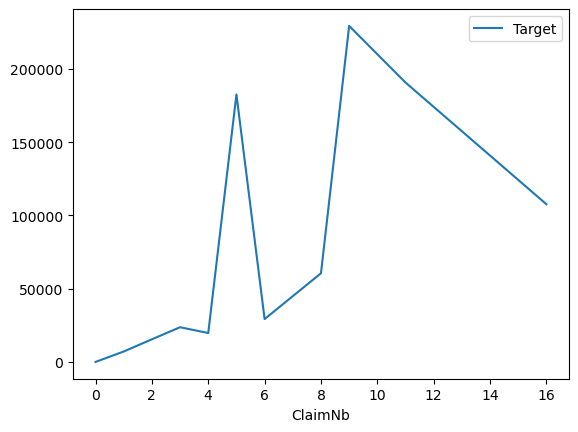

In [27]:
pd_risk_data.loc[:, ["ClaimNb", "Target"]].groupby("ClaimNb").mean().plot()

<AxesSubplot: xlabel='Density'>

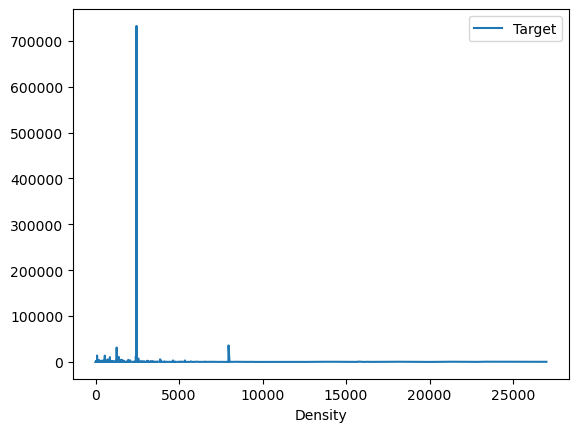

In [28]:
pd_risk_data.loc[:, ["Density", "Target"]].groupby("Density").mean().plot()

In [29]:
pd_risk_data.loc[:, ["Area", "Target"]].groupby("Area").count()

,Target
Area,
A,103957
B,75459
C,191880
D,151596
E,137167
F,17954


<AxesSubplot: xlabel='Area'>

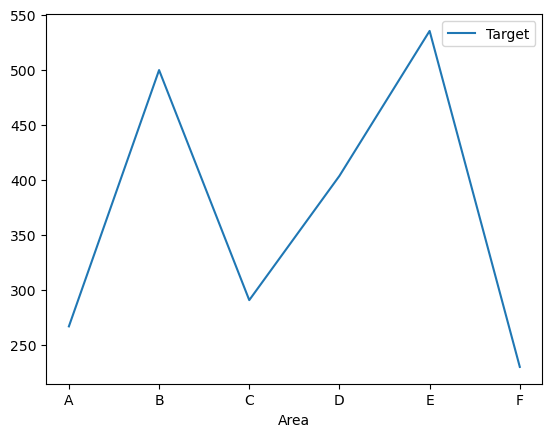

In [30]:
pd_risk_data.loc[:, ["Area", "Target"]].groupby("Area").mean().plot()

<AxesSubplot: xlabel='VehAge'>

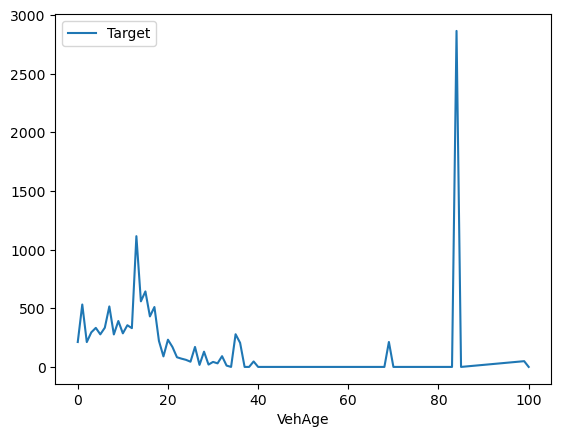

In [31]:
pd_risk_data.loc[:, ["VehAge", "Target"]].groupby("VehAge").mean().plot()

In [32]:
pd_risk_data.loc[:, ["VehBrand", "Target"]].groupby("VehBrand").count()

,Target
VehBrand,
B1,162736
B10,17707
B11,13585
B12,166024
B13,12178
B14,4047
B2,159861
B3,53395
B4,25179


In [33]:
pd_risk_data.loc[:, ["VehPower", "Target"]].groupby("VehPower").count()

,Target
VehPower,
4,115349
5,124821
6,148976
7,145401
8,46956
9,30085
10,31354
11,18352
12,8214


In [34]:
pd_risk_data.loc[:, ["VehBrand","VehPower", "Target"]].groupby(["VehBrand","VehPower"]).mean()

Target
VehBrand VehPower            
B1       4         473.526690
         5         212.974494
         6         423.325302
         7         206.899698
         8         401.868333
...                       ...
B6       11        285.763498
         12        107.650833
         13        158.166539
         14        439.435926
         15        258.924731

[131 rows x 1 columns]

<AxesSubplot: xlabel='VehBrand,VehPower'>

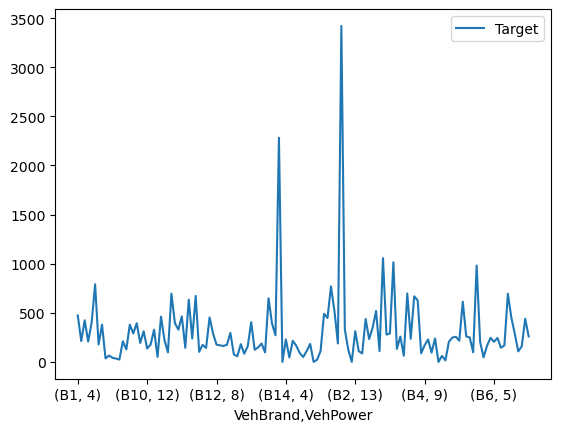

In [35]:
pd_risk_data.loc[:, ["VehBrand","VehPower", "Target"]].groupby(["VehBrand","VehPower"]).mean().plot()

<AxesSubplot: xlabel='VehBrand'>

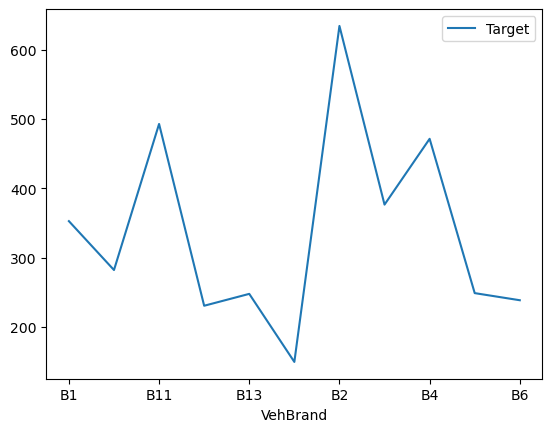

In [36]:
pd_risk_data.loc[:, ["VehBrand", "Target"]].groupby("VehBrand").mean().plot()

<AxesSubplot: xlabel='DrivAge'>

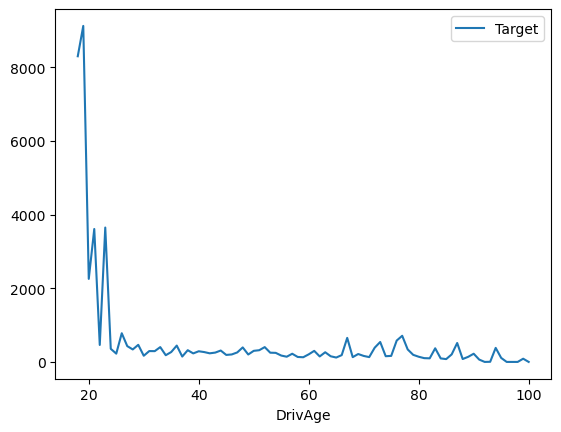

In [37]:
pd_risk_data.loc[:, ["DrivAge", "Target"]].groupby("DrivAge").mean().plot()

In [43]:
pd_risk_data["area_enc"] = area_encoder.transform(pd_risk_data["Area"])
pd_risk_data["vehbrand_enc"] = vehbrand_encoder.transform(pd_risk_data["VehBrand"])
pd_risk_data["vehgas_enc"] = vehgas_encoder.transform(pd_risk_data["VehGas"])
pd_risk_data["region_enc"] = region_encoder.transform(pd_risk_data["Region"])

In [39]:
pd_risk_data.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'Target', 'Target_log', 'Target_sqrt', 'area_enc', 'vehbrand_enc',
       'vehgas_enc', 'region_enc'],
      dtype='object')

In [44]:
pd_risk_data_encoded = pd_risk_data.loc[:, ['IDpol', 'ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehGas', 'Density',  'ClaimAmount',
       'Target', 'Target_log', 'area_enc', 'vehbrand_enc', 'vehgas_enc',
       'region_enc', 'Target_sqrt']]

In [ ]:
pd_risk_data_encoded.describe()

In [ ]:
sn.pairplot(pd_risk_data_encoded)

In [ ]:
pd_risk_data_encoded.shape

In [ ]:
pd_risk_data_encoded_Damage = pd_risk_data_encoded#.loc[pd_risk_data_encoded["Target"] > 0.0,:]

In [ ]:
pd_risk_data_encoded_Damage.shape

In [ ]:
pd_risk_data_encoded_Damage

In [ ]:
sn.pairplot(pd_risk_data_encoded_Damage)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix = pd_risk_data_encoded_Damage.corr()
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

In [ ]:
pd_risk_data_encoded_Damage[['ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehGas', 'Density',  'ClaimAmount',
       'Target']].hist()

In [ ]:
IDpol', 'ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehGas', 'Density',  'ClaimAmount',
       'Target', 'Target_log', 'area_enc', 'vehbrand_enc', 'vehgas_enc',
       'region_enc', 'Target_sqrt'

In [ ]:
pd_risk_data_encoded_Damage["Exposure"].hist()

In [ ]:
pd_risk_data_encoded_Damage.loc[:, ["Target",'Exposure']].groupby('Exposure').count().hist()

In [ ]:
pd_risk_data_encoded_Damage["Target"].describe()

In [ ]:
sn.violinplot(x=pd_risk_data_encoded_Damage.loc[pd_risk_data_encoded_Damage["Target"] < 10000 , "Target"])

In [ ]:
sn.violinplot(x=pd_risk_data_encoded_Damage.loc[:,"Exposure"])

In [45]:
pd_risk_data_encoded_Damage_Sqrt_fig = pd_risk_data_encoded

In [46]:
pd_risk_data_encoded_Damage_Sqrt_fig['Exposure_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['Exposure'])
pd_risk_data_encoded_Damage_Sqrt_fig['VehPower_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['VehPower'])
pd_risk_data_encoded_Damage_Sqrt_fig['ClaimNb_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['ClaimNb'])
pd_risk_data_encoded_Damage_Sqrt_fig['VehAge_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['VehAge'])
pd_risk_data_encoded_Damage_Sqrt_fig['DrivAge_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['DrivAge'])
pd_risk_data_encoded_Damage_Sqrt_fig['BonusMalus_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['BonusMalus'])
pd_risk_data_encoded_Damage_Sqrt_fig['Density_log'] = np.log(pd_risk_data_encoded_Damage_Sqrt_fig['Density'])


#, 'VehPower', 'VehAge', 'DrivAge',
#       'BonusMalus', 'VehGas', 'Density',  'ClaimAmount',
#       'Target'

D:\Users\procy\anaconda3\envs\goldeneye\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Users\procy\anaconda3\envs\goldeneye\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
sn.violinplot(x=pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,"VehPower_sqrt"])

In [ ]:
pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,"VehPower_log"].hist()

In [ ]:
from scipy import stats
pd_risk_data_encoded_Damage_Sqrt_fig['VehPower_bxcx'] , lambda_bc = stats.boxcox(pd_risk_data_encoded_Damage_Sqrt_fig['VehPower'] )

In [ ]:
lambda_bc

In [ ]:
sn.violinplot(x=pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,"VehPower_bxcx"])

In [ ]:
pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,"VehPower_bxcx"].hist()

In [ ]:
pd_risk_data_encoded_Damage_Sqrt_fig.columns

In [ ]:
sn.pairplot(pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,['ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehGas', 'Density', 'ClaimAmount', 'Target',
       'Target_log', 
       'Target_sqrt', 'Exposure_log', 'Exposure_sqrt', 'VehPower_log',
       'VehPower_sqrt', 'Exposure_bxcx', 'VehPower_bxcx']])

In [ ]:
sn.pairplot(pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,['ClaimNb', 'Exposure', 'VehPower_log', 'ClaimNb_log', 'VehAge_log',
       'DrivAge_log', 'VehGas', 'BonusMalus_log', 'Density_log', 'Target',
       'Target_log', 
       'Target_sqrt']])

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix = pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,['ClaimNb', 'Exposure', 'VehPower_log', 'ClaimNb_log', 'VehAge_log',
       'DrivAge_log', 'VehGas', 'BonusMalus_log', 'Density_log', 'Target',
       'Target_log', 
       'Target_sqrt']].corr()
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

In [ ]:
pd_risk_data.columns

In [ ]:
X.dtypes

In [ ]:
y.dtypes

In [74]:
data = pd_risk_data_encoded_Damage_Sqrt_fig.loc[:,[ 'ClaimNb_log', 'VehPower', 'VehAge', 'DrivAge_log',
       'BonusMalus', 'Density',  'ClaimAmount', 'area_enc', 'vehbrand_enc', 'vehgas_enc',
       'region_enc','Target_sqrt']]

In [75]:
X_y= data.loc[:,[ 'ClaimNb_log', 'VehPower', 'VehAge', 'DrivAge_log',
       'BonusMalus', 'Density',  'ClaimAmount', 'area_enc', 'vehbrand_enc', 'vehgas_enc',
       'region_enc','Target_sqrt']]


In [63]:
X_y["label"] = 0
X_y.loc[X_y['Target_sqrt'] > 0.0, "label"] = 1.0

In [64]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_y.loc[:,[ 'ClaimNb_log', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'Density',  'ClaimAmount', 'area_enc', 'vehbrand_enc', 'vehgas_enc',
       'region_enc']], X_y.loc[:,['Target_sqrt']], test_size=0.2, random_state=42, stratify=X_y["label"])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

In [ ]:
neigh.score(X_test, y_test)

In [ ]:
a = neigh.predict(X_test)

In [ ]:
pd_df = pd.DataFrame(a)
pd_df["True"] = y_test

In [ ]:
pd_df.plot()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(a, y_test)

In [ ]:
a - y_test

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)
b = reg.predict(X_test)

In [ ]:
mean_squared_error(b , y_test)

In [ ]:
pd_df = pd.DataFrame(b)
pd_df["True"] = y_test
pd_df.plot()

In [76]:


a_B =X_y


In [77]:
a_B[a_B["DrivAge_log"]<=0.0] = 0.0


<AxesSubplot: xlabel='DrivAge_log', ylabel='Target_sqrt'>

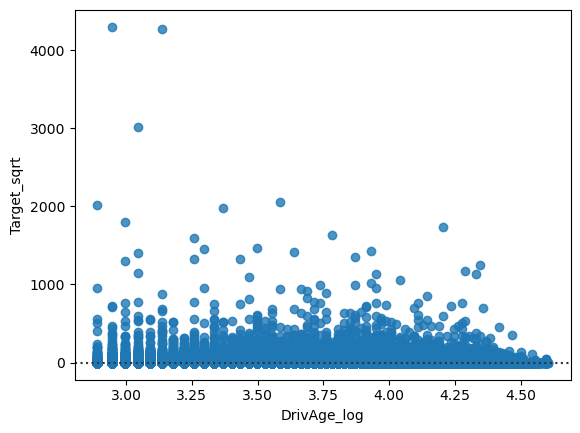

In [78]:
sn.residplot(data=a_B, x="DrivAge_log", y="Target_sqrt")